# **Butterfly Classification**

In [1]:
import numpy as np, pandas as pd
from PIL import Image
import os
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

2025-09-21 20:09:40.448009: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758485380.643422      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758485380.696966      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
df = pd.read_csv("/kaggle/input/butterfly-image-classification/Training_set.csv")
df

filename                     label
0        Image_1.jpg          SOUTHERN DOGFACE
1        Image_2.jpg                    ADONIS
2        Image_3.jpg            BROWN SIPROETA
3        Image_4.jpg                   MONARCH
4        Image_5.jpg  GREEN CELLED CATTLEHEART
...              ...                       ...
6494  Image_6495.jpg          MANGROVE SKIPPER
6495  Image_6496.jpg            MOURNING CLOAK
6496  Image_6497.jpg                   APPOLLO
6497  Image_6498.jpg           ELBOWED PIERROT
6498  Image_6499.jpg                     ATALA

[6499 rows x 2 columns]

In [ ]:
folder_path = "/kaggle/input/butterfly-image-classification/train"
files = os.listdir(folder_path)

def extract_number(f):
    return int(re.search(r'\d+', f).group())

def load_files(folder_path, files):
    data = [] 
    file_name = []
    for i in range(len(files)):
        img = Image.open(os.path.join(folder_path, files[i]))
        data.append(np.array(img))
        file_name.append(files[i])
        df = pd.DataFrame({
            "filename": file_name,
            "data": data
        })
        df = df.sort_values(by="filename",key=lambda x: x.map(extract_number)).reset_index(drop=True)
    return np.array(df["data"])
X = load_files(folder_path,files)
plt.imshow(X[0])
plt.axis("off")
plt.show()

In [4]:
X[0]

array([[[ 25,  43,  31],
        [ 25,  43,  31],
        [ 26,  42,  29],
        ...,
        [ 35,  47,  23],
        [ 40,  53,  27],
        [ 46,  59,  33]],

       [[ 26,  44,  32],
        [ 25,  43,  29],
        [ 26,  42,  29],
        ...,
        [ 46,  59,  33],
        [ 53,  63,  38],
        [ 56,  69,  41]],

       [[ 24,  45,  30],
        [ 24,  45,  28],
        [ 25,  43,  27],
        ...,
        [ 59,  69,  42],
        [ 63,  72,  43],
        [ 67,  78,  48]],

       ...,

       [[ 61,  97,  61],
        [ 67, 103,  65],
        [ 68, 107,  63],
        ...,
        [ 41,  63,  24],
        [ 43,  66,  22],
        [ 44,  67,  21]],

       [[ 64,  98,  63],
        [ 71, 107,  69],
        [ 71, 110,  66],
        ...,
        [ 41,  64,  20],
        [ 43,  66,  20],
        [ 42,  68,  20]],

       [[ 70, 104,  69],
        [ 73, 109,  71],
        [ 74, 111,  68],
        ...,
        [ 42,  65,  19],
        [ 42,  68,  21],
        [ 43,  69,  21]]

In [5]:
X.shape

(6499,)

In [6]:
encoder = LabelEncoder()
df["encoded_label"] = encoder.fit_transform(df['label'])
df

filename                     label  encoded_label
0        Image_1.jpg          SOUTHERN DOGFACE             66
1        Image_2.jpg                    ADONIS              0
2        Image_3.jpg            BROWN SIPROETA             12
3        Image_4.jpg                   MONARCH             44
4        Image_5.jpg  GREEN CELLED CATTLEHEART             33
...              ...                       ...            ...
6494  Image_6495.jpg          MANGROVE SKIPPER             40
6495  Image_6496.jpg            MOURNING CLOAK             45
6496  Image_6497.jpg                   APPOLLO              4
6497  Image_6498.jpg           ELBOWED PIERROT             29
6498  Image_6499.jpg                     ATALA              5

[6499 rows x 3 columns]

In [7]:
X = X/255

In [8]:
X[0]

array([[[0.09803922, 0.16862745, 0.12156863],
        [0.09803922, 0.16862745, 0.12156863],
        [0.10196078, 0.16470588, 0.11372549],
        ...,
        [0.1372549 , 0.18431373, 0.09019608],
        [0.15686275, 0.20784314, 0.10588235],
        [0.18039216, 0.23137255, 0.12941176]],

       [[0.10196078, 0.17254902, 0.1254902 ],
        [0.09803922, 0.16862745, 0.11372549],
        [0.10196078, 0.16470588, 0.11372549],
        ...,
        [0.18039216, 0.23137255, 0.12941176],
        [0.20784314, 0.24705882, 0.14901961],
        [0.21960784, 0.27058824, 0.16078431]],

       [[0.09411765, 0.17647059, 0.11764706],
        [0.09411765, 0.17647059, 0.10980392],
        [0.09803922, 0.16862745, 0.10588235],
        ...,
        [0.23137255, 0.27058824, 0.16470588],
        [0.24705882, 0.28235294, 0.16862745],
        [0.2627451 , 0.30588235, 0.18823529]],

       ...,

       [[0.23921569, 0.38039216, 0.23921569],
        [0.2627451 , 0.40392157, 0.25490196],
        [0.26666667, 0

In [ ]:
plt.imshow(X[0])

In [10]:
encoder.classes_, encoder.classes_.shape

(array(['ADONIS', 'AFRICAN GIANT SWALLOWTAIL', 'AMERICAN SNOOT', 'AN 88',
        'APPOLLO', 'ATALA', 'BANDED ORANGE HELICONIAN', 'BANDED PEACOCK',
        'BECKERS WHITE', 'BLACK HAIRSTREAK', 'BLUE MORPHO',
        'BLUE SPOTTED CROW', 'BROWN SIPROETA', 'CABBAGE WHITE',
        'CAIRNS BIRDWING', 'CHECQUERED SKIPPER', 'CHESTNUT', 'CLEOPATRA',
        'CLODIUS PARNASSIAN', 'CLOUDED SULPHUR', 'COMMON BANDED AWL',
        'COMMON WOOD-NYMPH', 'COPPER TAIL', 'CRECENT', 'CRIMSON PATCH',
        'DANAID EGGFLY', 'EASTERN COMA', 'EASTERN DAPPLE WHITE',
        'EASTERN PINE ELFIN', 'ELBOWED PIERROT', 'GOLD BANDED',
        'GREAT EGGFLY', 'GREAT JAY', 'GREEN CELLED CATTLEHEART',
        'GREY HAIRSTREAK', 'INDRA SWALLOW', 'IPHICLUS SISTER', 'JULIA',
        'LARGE MARBLE', 'MALACHITE', 'MANGROVE SKIPPER', 'MESTRA',
        'METALMARK', 'MILBERTS TORTOISESHELL', 'MONARCH', 'MOURNING CLOAK',
        'ORANGE OAKLEAF', 'ORANGE TIP', 'ORCHARD SWALLOW', 'PAINTED LADY',
        'PAPER KITE', 'PEACO

1 78 279 329 347 451 ADONIS


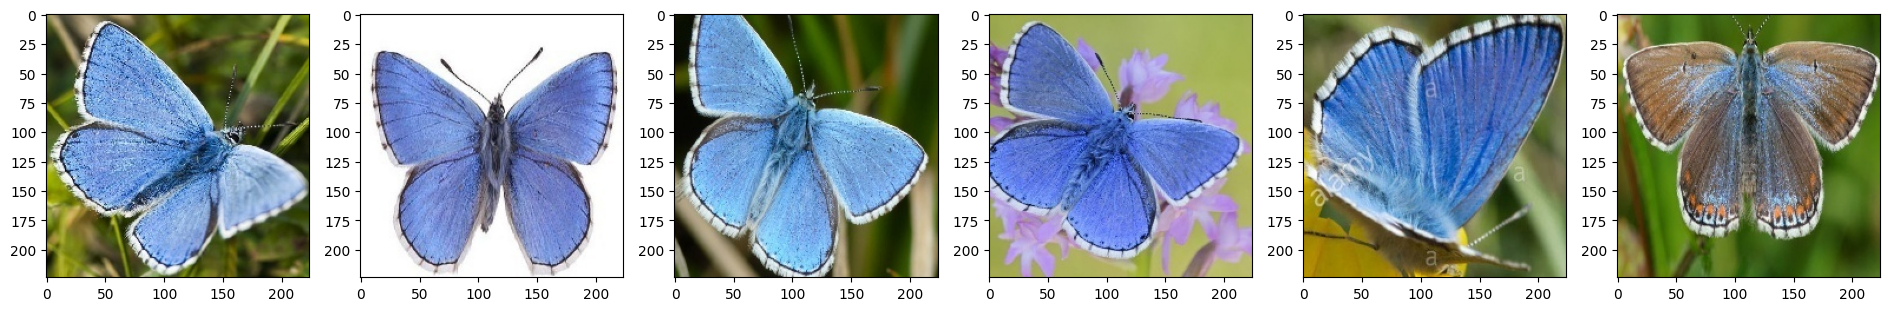

289 373 427 437 465 503 AFRICAN GIANT SWALLOWTAIL


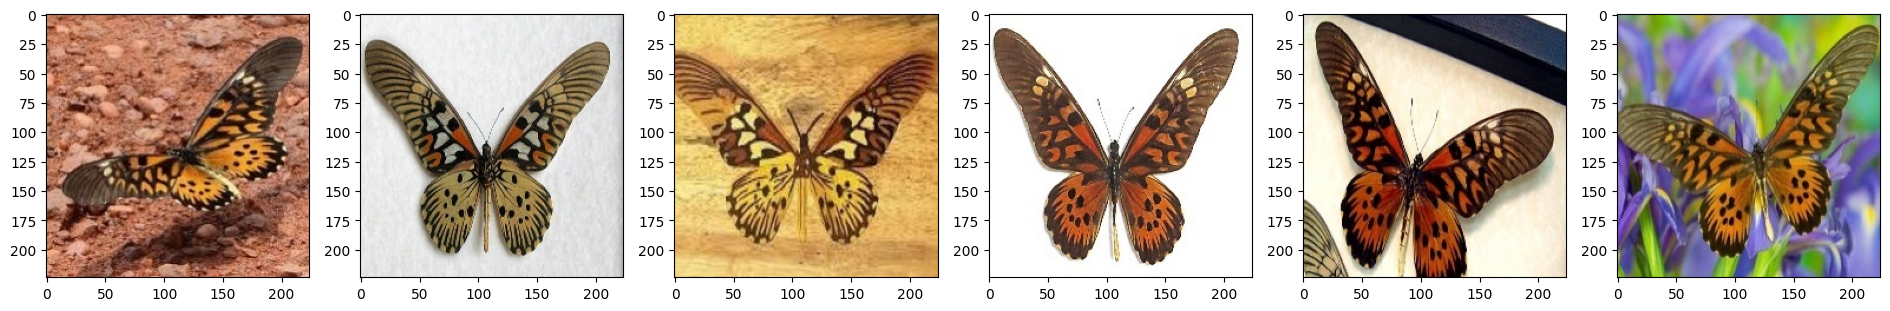

116 238 307 334 386 467 AMERICAN SNOOT


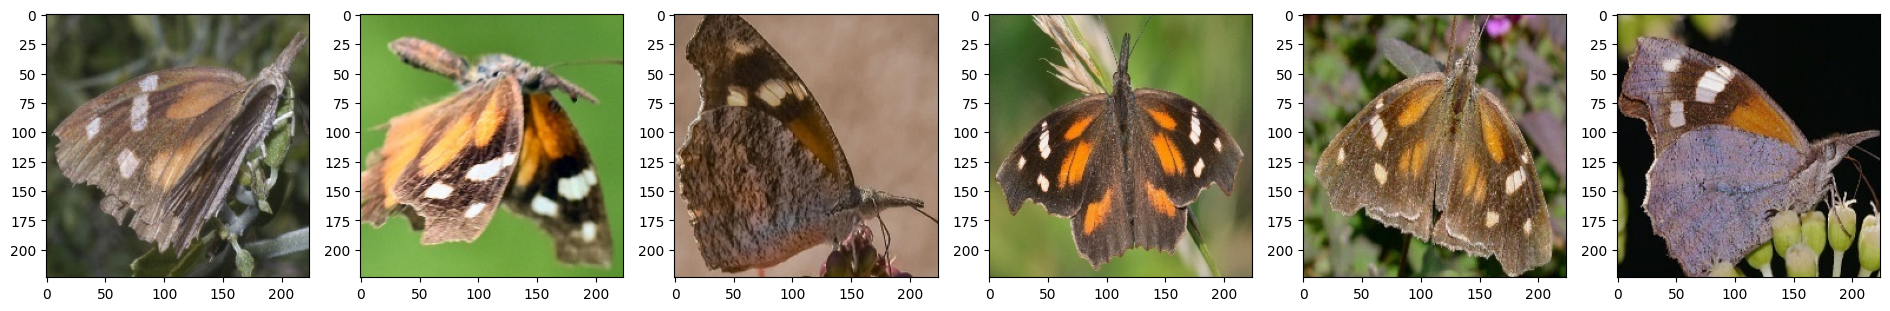

122 320 342 464 534 782 AN 88


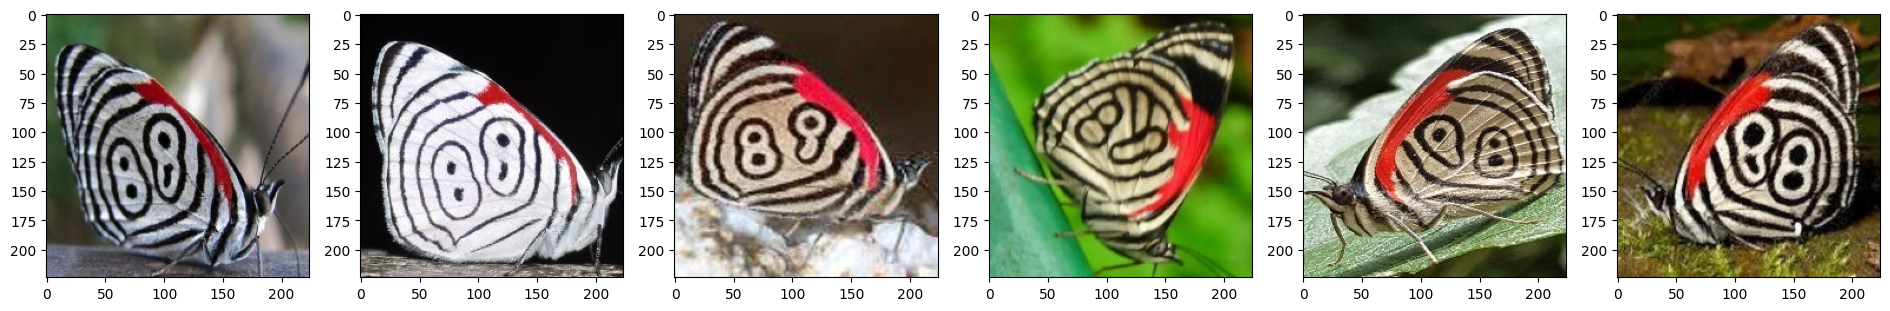

65 85 303 324 416 472 APPOLLO


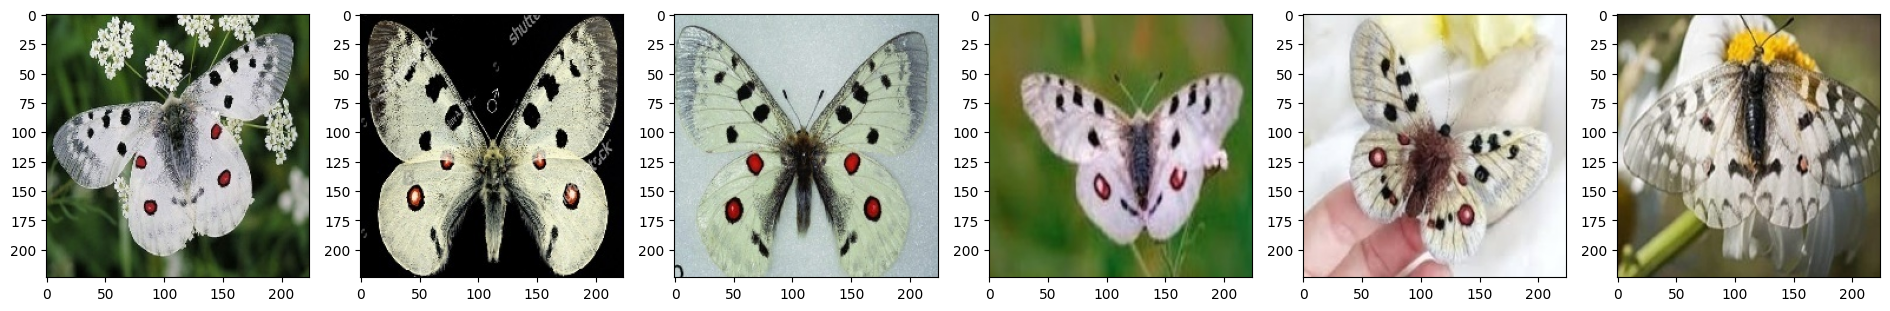

29 71 103 252 258 294 ATALA


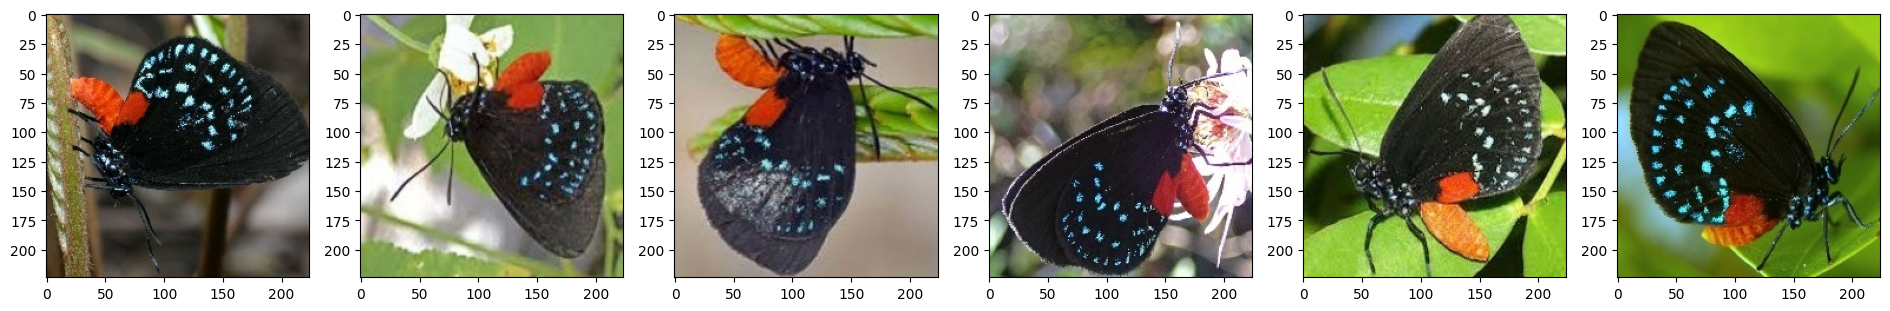

In [11]:
for k in range(6):
    plt.figure(figsize=(19, 100))
    j=0
    for i in df.index[df["encoded_label"]==k][:6].to_list():
        print(i, end=" ")
        ax = plt.subplot(20, 6, j + 1)
        j+=1
        plt.imshow(X[i])
    print(df["label"][i])
    plt.tight_layout()
    plt.show()

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    # tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    # tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1000, activation="relu"),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(75, activation="softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1758485476.274277      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [13]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [14]:
from sklearn.model_selection import train_test_split
Y = np.array(df["encoded_label"], dtype="float32")
X = np.array(X.tolist(), dtype="float32")
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_test, y_test, test_size=0.5, random_state=42, stratify=y_test
)
type(y_train)

numpy.ndarray

In [15]:
model.fit(X_train,y_train,epochs = 10, validation_data=(X_val, y_val))

Epoch 1/10


I0000 00:00:1758485492.326539     100 service.cc:148] XLA service 0x788310008960 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1758485492.327233     100 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1758485492.559332     100 cuda_dnn.cc:529] Loaded cuDNN version 90300


  3/163 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - accuracy: 0.0000e+00 - loss: 44.5003

I0000 00:00:1758485495.892563     100 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


163/163 ━━━━━━━━━━━━━━━━━━━━ 22s 94ms/step - accuracy: 0.0391 - loss: 24.5692 - val_accuracy: 0.1815 - val_loss: 3.4416
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - accuracy: 0.3655 - loss: 2.6519 - val_accuracy: 0.3862 - val_loss: 2.3772
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - accuracy: 0.8290 - loss: 0.7214 - val_accuracy: 0.3615 - val_loss: 2.5445
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - accuracy: 0.9872 - loss: 0.0920 - val_accuracy: 0.4062 - val_loss: 2.6475
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - accuracy: 0.9988 - loss: 0.0178 - val_accuracy: 0.4277 - val_loss: 2.5787
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - accuracy: 1.0000 - loss: 0.0043 - val_accuracy: 0.4354 - val_loss: 2.6234
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.4400 - val_loss: 2.6922
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - accuracy: 1.0000 - loss: 8.4590e-04 - val_ac

In [16]:
from tensorflow.keras.preprocessing import image
img_array = image.img_to_array(X[0]) / 255.0  # normalize (0-1)
img_array = np.expand_dims(img_array, axis=0)  # shape: (1, 224, 224, 3)

# Make prediction
pred = model.predict(img_array)
pred_class = np.argmax(pred, axis=1)  # get class index
pred_class

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([20])

In [17]:
model.evaluate(X_test, y_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3909 - loss: 3.1505


[3.110191822052002, 0.42461538314819336]